In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

abalone = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/abalone_csv.csv')

In [3]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex                      4177 non-null object
Length                   4177 non-null float64
Diameter                 4177 non-null float64
Height                   4177 non-null float64
Whole_weight             4177 non-null float64
Shucked_weight           4177 non-null float64
Viscera_weight           4177 non-null float64
Shell_weight             4177 non-null float64
Class_number_of_rings    4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
abalone.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
m_abalone = abalone[abalone['Sex'] == 'M']
f_abalone = abalone[abalone['Sex'] == 'F']
print(m_abalone.shape)
print(f_abalone.shape)

(1528, 9)
(1307, 9)


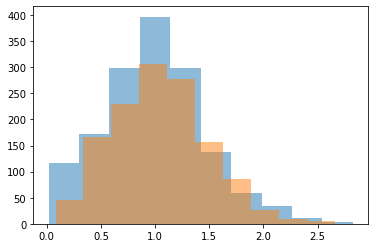

In [6]:
plt.hist(m_abalone['Whole_weight'], alpha=.5)
plt.hist(f_abalone['Whole_weight'], alpha=.5)
plt.show()

In [7]:
print(stats.describe(m_abalone['Whole_weight']))
print(stats.describe(f_abalone['Whole_weight']))

DescribeResult(nobs=1528, minmax=(0.0155, 2.8255), mean=0.9914594240837696, variance=0.22144682906633475, skewness=0.40560877693983, kurtosis=0.3522080855157492)
DescribeResult(nobs=1307, minmax=(0.08, 2.657), mean=1.0465321346595258, variance=0.18517212913502626, skewness=0.36807506367868875, kurtosis=0.059025885863292604)


### Does the data meet the assumptions to answer such a question statistically

Yes, continuous, independent, random, normal, large sample size, equal variance

### What are the formal hypotheses

Ho: No significant difference in the mean weight between sexes

Ha: There is a significant difference between mean whole weight between sexes

In [8]:
result = stats.ttest_ind(f_abalone['Whole_weight'], m_abalone['Whole_weight'])
print(result)

Ttest_indResult(statistic=3.230536346547456, pvalue=0.0012497207919589404)


In [9]:
print('The p-value is', result.pvalue)

The p-value is 0.0012497207919589404


In [10]:
print('We reject the null hypothesis that there is no significant difference between the means of male and female abalone snails because both the t-statistic: {} is greater than 1.96 and the p-value: {} is less than than .05.'.format(result.statistic, result.pvalue))

We reject the null hypothesis that there is no significant difference between the means of male and female abalone snails because both the t-statistic: 3.230536346547456 is greater than 1.96 and the p-value: 0.0012497207919589404 is less than than .05.


In [11]:
print(help(stats.normaltest))

Help on function normaltest in module scipy.stats.stats:

normaltest(a, axis=0, nan_policy='propagate')
    Test whether a sample differs from a normal distribution.
    
    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.
    
    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': returns nan
          * 'raise': throws an error
          * 'omit': performs the calculations ignoring nan values
    
    Returns
  

In [12]:
import math
# round to significant number
def round_sig(x, sig=4):
    return round(x, sig-int(math.floor(math.log10(abs(x)))) -1)

# Calculating confidence interval
def get_95_ci(array_1, array_2):
    n_1 = array_1.shape[0]
    n_2 = array_2.shape[0]
    mean_1 = array_1.mean()
    mean_2 = array_2.mean()
    var_1 = array_1.var()
    var_2 = array_2.var()
    mean_difference = mean_2 - mean_1
    std_err_difference = math.sqrt((var_1/n_1) + (var_2/n_2))
    margin_of_error = 1.96 * std_err_difference
    ci_upper = mean_difference + margin_of_error
    ci_lower = mean_difference - margin_of_error
    return 'The difference in means at the 95% confidence interval (two-tail) is between {} and {}.'.format(round_sig(ci_lower), round_sig(ci_upper))


get_95_ci(m_abalone.Whole_weight, f_abalone.Whole_weight)

'The difference in means at the 95% confidence interval (two-tail) is between 0.02189 and 0.08825.'

In [15]:
# Calculate cohen's D
def get_cd(array_1, array_2):
    n_1 = array_1.shape[0]
    n_2 = array_2.shape[0]
    var_1 = array_1.var()
    var_2 = array_1.var()
    sd_pooled = math.sqrt( ((n_1 - 1) * var_1) + ((n_2 - 1) * var_2) / (n_1 + n_2 - 2))
    effect_size = array_2.mean() - array_1.mean()
    d = effect_size / sd_pooled
    return 'The difference in means is {} with a cohen\'s d of {}'.format(round_sig(effect_size), round_sig(d))

get_cd(m_abalone.Whole_weight, f_abalone.Whole_weight)


"The difference in means is 0.05507 with a cohen's d of 0.002994"

# All Done!